# Analyse exploratoire des données Network

In [1]:
# Librairies
import pandas as pd
from pickleshare import PickleShareDB

from sklearn.preprocessing import OrdinalEncoder

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
from plotly.graph_objs import Bar
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

Nous chargeons les données depuis le fichier des données préprarées.

In [2]:
# Données nettoyées
db = PickleShareDB('../prep_data/kity')

df_net_1 = db['net_attack_1_clean']
df_net_2 = db['net_attack_2_clean']
df_net_3 = db['net_attack_3_clean']
df_net_4 = db['net_attack_4_clean']
df_net_norm = db['net_norm_clean']

# Données brutes
'''
df_net_1 = db['net_attack_1']
df_net_2 = db['net_attack_2']
df_net_3 = db['net_attack_3']
df_net_4 = db['net_attack_4']
df_net_norm = db['net_norm']
'''

"\ndf_net_1 = db['net_attack_1']\ndf_net_2 = db['net_attack_2']\ndf_net_3 = db['net_attack_3']\ndf_net_4 = db['net_attack_4']\ndf_net_norm = db['net_norm']\n"

In [3]:
# nombre de valeurs unique par colonne pour chaque dataset
nunique_1 = df_net_1.nunique()
nunique_2 = df_net_2.nunique()
nunique_3 = df_net_3.nunique()
nunique_4 = df_net_4.nunique()
nunique_norm = df_net_norm.nunique()
print(nunique_1)
print(nunique_2)
print(nunique_3)
print(nunique_4)
print(nunique_norm)

Time               5242099
mac_s                    8
mac_d                    9
ip_s                     8
ip_d                     8
sport                    4
dport                    4
proto                    4
flags                    8
size                     7
modbus_fn                5
n_pkt_src               54
n_pkt_dst               53
modbus_response         11
label_n                  2
label                    4
is_duplicate             2
dtype: int64
Time               5157725
mac_s                    8
mac_d                    9
ip_s                     9
ip_d                     9
sport                    4
dport                    4
proto                    4
flags                   13
size                    10
modbus_fn                5
n_pkt_src               98
n_pkt_dst               95
modbus_response         10
label_n                  2
label                    6
is_duplicate             2
dtype: int64
Time               5678943
mac_s                    8
ma

Nous commençons par observer le premier, comme ils doivent à priori avoir la même structure, pour comprendre les données que l'on a.

In [4]:
df_net_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5527407 entries, 0 to 5527408
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Time             datetime64[ns]
 1   mac_s            object        
 2   mac_d            object        
 3   ip_s             object        
 4   ip_d             object        
 5   sport            category      
 6   dport            category      
 7   proto            object        
 8   flags            category      
 9   size             int64         
 10  modbus_fn        object        
 11  n_pkt_src        Int64         
 12  n_pkt_dst        Int64         
 13  modbus_response  object        
 14  label_n          bool          
 15  label            category      
 16  is_duplicate     bool          
dtypes: Int64(2), bool(2), category(4), datetime64[ns](1), int64(1), object(7)
memory usage: 548.2+ MB


## Analyse des différents types de colonnes

In [5]:
# Colonnes de chaque type
df_bool = df_net_1.select_dtypes(include='bool')
print("Colonnes de type booléen : \n", df_bool.columns,"\n")

df_obj = df_net_1.select_dtypes(include='object')
print("Colonnes de type objet : \n",df_obj.columns,"\n")

df_cat = df_net_1.select_dtypes(include='category')
print("Colonnes de type catégorie : \n", df_cat.columns,"\n")

df_num = df_net_1.select_dtypes(include='number')
print("Colonnes de type nombre : \n", df_num.columns,"\n")  

df_time = df_net_1.select_dtypes(include='datetime')
print("Colonnes de type datetime : \n", df_time.columns)

Colonnes de type booléen : 
 Index(['label_n', 'is_duplicate'], dtype='object') 

Colonnes de type objet : 
 Index(['mac_s', 'mac_d', 'ip_s', 'ip_d', 'proto', 'modbus_fn',
       'modbus_response'],
      dtype='object') 

Colonnes de type catégorie : 
 Index(['sport', 'dport', 'flags', 'label'], dtype='object') 

Colonnes de type nombre : 
 Index(['size', 'n_pkt_src', 'n_pkt_dst'], dtype='object') 

Colonnes de type datetime : 
 Index(['Time'], dtype='object')


### Analyse colonnes booléennes

In [6]:
fig = make_subplots(rows=1, cols=len(df_bool.columns), subplot_titles=df_bool.columns)

for i, col in enumerate(df_bool.columns):
    value_counts = df_bool[col].value_counts()
    fig.add_trace(go.Bar(x=value_counts.index, y=value_counts.values, name=col), row=1, col=i+1)


fig.update_layout(height=300, width=500, title="Fréquence des valeurs uniques par colonne (category)", showlegend=False)

fig.show()

### Analyse des colonnes numériques

In [7]:
df_num.describe()

,size,n_pkt_src,n_pkt_dst
count,5.527407e+06,5527407.0,5527407.0
mean,6.532782e+01,30.705765,30.742277
std,1.400716e+00,17.567709,17.536005
min,6.000000e+01,0.0,0.0
25%,6.500000e+01,15.0,15.0
50%,6.600000e+01,19.0,19.0
75%,6.600000e+01,50.0,50.0
max,7.800000e+01,53.0,52.0


In [8]:
# Statistiques descriptives
desc_stats = df_num.describe()
desc_stats = desc_stats.drop('count') # suppression de la colonne count pour la visualisation

fig = make_subplots(rows=1, cols=len(desc_stats.columns), subplot_titles=desc_stats.columns)
for i, col in enumerate(desc_stats.columns):
    fig.add_trace(go.Bar(x=desc_stats.index, y=desc_stats[col], name=col),row=1, col=i+1)

fig.update_layout(height=700, width=1200,title="Statistiques descriptives par colonne",showlegend=False)

fig.show()

In [9]:
# Répartition des valeurs pour chaque colonne
for col in df_num.columns:
    print(col, df_num[col].value_counts())

size size
66    2733117
65    1426127
64    1257165
60      51804
74      42633
78      12614
77       3947
Name: count, dtype: int64
n_pkt_src n_pkt_src
15    1515089
50    1074699
49     453662
51     434475
14     377759
13     202141
4      197631
44     139127
45     128248
18     120700
16     109241
43     104744
48      94806
46      81052
17      78291
47      71211
19      50358
20      44819
12      23025
42      22081
3       18901
5       15348
6       14807
39      14309
11      14256
40      13970
38      13054
10      12033
41      12000
9       11829
37      11292
7       10992
8        9666
21       5283
36       5261
2        4389
0        4223
1        4215
22       2146
35       1497
23       1287
34       1197
33        884
32        510
24        350
31        226
30         89
25         88
29         46
26         38
28         29
27         17
52         14
53          2
Name: count, dtype: Int64
n_pkt_dst n_pkt_dst
15    1477044
50    1074246
49     457132
51

In [10]:
fig = make_subplots(rows=1, cols=len(df_cat.columns), subplot_titles=df_cat.columns)

for i, col in enumerate(df_cat.columns):
    value_counts = df_cat[col].value_counts().head(10)  # Pour éviter d'avoir trop de valeurs
    fig.add_trace(go.Bar(x=value_counts.index, y=value_counts.values, name=col), row=1, col=i+1)


fig.update_layout(height=700, width=1300, title="Fréquence des valeurs uniques par colonne (category)", showlegend=False)

fig.show()

In [11]:
# Répartition des valeurs pour chaque colonne (graphique)
columns = df_num.columns
titles = ["Size", "n_pkt_src", "n_pkt_dst"]

fig = sp.make_subplots(rows=2, cols=2, subplot_titles=titles, vertical_spacing=0.1, horizontal_spacing=0.15)
for i, col in enumerate(columns):
    row = (i // 2) + 1
    col_position = (i % 2) + 1
    fig.add_trace(Bar(x=df_num[col].value_counts().index, y=df_num[col].value_counts().values, name=titles[i]),row=row, col=col_position)

fig.update_layout(height=700, width=700, title_text="Distribution des valeurs dans les colonnes numériques",showlegend=False)

fig.show()

- sport
    - Distribution : Forte concentration de valeurs spécifiques (port 502 par exemple qui est spécifique aux Modbus), certains ports moins représentés pourrait être des accès interdits

- dport
    - Comme pour sport, la majorité des paquets sont concentrés sur quelques ports de destination, avec le port 502 comme destination principale. \
    Des valeurs plus rares sont observées, mais elles sont peu fréquentes. Cela pourrait également être des attaques.

- flags
    - La plupart des valeurs sont à 11000, forte concentration autour de valeurs spécifiques (états standards de connexion ??)
    - La majorité des paquets ont des flags identiques, ce qui est attendu pour des communications stables. \
    Quelques variations existent, ce qui peut représenter des tentatives d’intrusion ou des anomalies.

- size
    - Tailles de paquets concentrées autour de valeurs entre 64 et 66 octets + peu de variation
    - Distribution fortement centrée sur 66 octets (taille de paquets standard pour les échanges de données Modbus ??) \
    --> paquets d'autres tailles pourraient être intéressants à analyser pour des comportements anormaux

- n_pkt_src
    - La distribution présente des pics élevés pour certaines valeurs spécifiques (flux réguliers de données ?? surcharge ou un potentiel DoS ???)

- n_pkt_dst
    - Pics dans la distribution indiquent des destinations qui reçoivent un grand nombre de paquets ?? anomalies ??

- label_n
    - Valeurs sont binaires (0 ou 1), avec 0 = paquets normaux et 1 attaque
    -La majorité des paquets sont normaux, donc dataset déséquilibré MAIS représentatif ?

### Analyse des colonnes catégorielles

In [12]:
# Valeurs uniques pour chaque colonne
for col in df_cat.columns:
    print(col, df_cat[col].value_counts())

sport sport
system_ports             2755880
dynamic/private_ports    2717013
user_ports                 54001
inconnu                      513
Name: count, dtype: int64
dport dport
system_ports             2771014
dynamic/private_ports    2710772
user_ports                 45108
inconnu                      513
Name: count, dtype: int64
flags flags
11000       5383646
10000         53601
10            26410
10010         26409
10001         26361
100            5361
10100          5106
inconnue        513
Name: count, dtype: int64
label label
normal            3687410
MITM              1214097
physical fault     625691
anomaly               209
Name: count, dtype: int64


In [13]:
fig = make_subplots(rows=1, cols=len(df_cat.columns), subplot_titles=df_cat.columns)

for i, col in enumerate(df_cat.columns):
    value_counts = df_cat[col].value_counts().head(10)  # Pour éviter d'avoir trop de valeurs
    fig.add_trace(go.Bar(x=value_counts.index, y=value_counts.values, name=col), row=1, col=i+1)


fig.update_layout(height=700, width=1300, title="Fréquence des valeurs uniques par colonne (category)", showlegend=False)

fig.show()

### Analyse des colonnes de type objet

In [14]:
# Valeurs uniques pour chaque colonne
for col in df_obj.columns:
    print(col, df_obj[col].value_counts())

mac_s mac_s
74:46:a0:bd:a7:1b    2678457
0a:fe:ec:47:74:fb     853232
e6:3f:ac:c9:a8:8c     850385
fa:00:bc:90:d7:fa     833496
00:80:f4:03:fb:12     276589
fe:bb:16:7b:c3:27      14801
4a:35:83:e0:3d:a4      14661
00:0c:29:47:8c:22       5786
Name: count, dtype: int64
mac_d mac_d
74:46:a0:bd:a7:1b    2678456
0a:fe:ec:47:74:fb     858271
e6:3f:ac:c9:a8:8c     853239
fa:00:bc:90:d7:fa     833390
00:80:f4:03:fb:12     276586
fe:bb:16:7b:c3:27      10942
4a:35:83:e0:3d:a4      10784
00:0c:29:47:8c:22       5597
ff:ff:ff:ff:ff:ff        142
Name: count, dtype: int64
ip_s ip_s
84.3.251.20     2678448
84.3.251.102     854860
84.3.251.101     851692
84.3.251.103     834158
84.3.251.18      277499
84.3.251.104      15486
84.3.251.105      14791
inconnue            473
Name: count, dtype: int64
ip_d ip_d
84.3.251.20     2678456
84.3.251.102     860155
84.3.251.101     854680
84.3.251.103     833855
84.3.251.18      277494
84.3.251.104      11352
84.3.251.105      10942
inconnue            473
N

In [15]:
fig = make_subplots(rows=1, cols=len(df_obj.columns), subplot_titles=df_obj.columns)

for i, col in enumerate(df_obj.columns):
    value_counts = df_obj[col].value_counts().head(10)  # Pour éviter d'avoir trop de valeurs
    fig.add_trace(go.Bar(x=value_counts.index, y=value_counts.values, name=col), row=1, col=i+1)


fig.update_layout(height=700, width=1300, title="Fréquence des valeurs uniques par colonne (object)", showlegend=False)

fig.show()

- mac_s, mac_d : 
    - une adresse principale largement dominante 
    - trafic centré autour de quelques appareils
    - autres sont peut-être anormales

- ip_s, ip_d : 
    - adresses IP source et destination également dominées par quelques valeurs
    - communication entre des hôtes spécifiques

- proto : 
    - protocole Modbus de loin le plus utilisé,
    - confirme l’utilisation majoritaire de Modbus dans le système

- modbus_fn : 
    - Les fonctions Modbus, toutes utilisées de façon plus ou moins équivalentes
    - Quelques valeurs inconnues, peut-être attaques

- modbus_response : 
    - réponse "Pas de réponse" dominante, surement représentant une exécution correcte
    - autres valeurs beaucoup moins présentes

- label : 
    - majorité des données marquées comme normales
    - autres valeurs non normales

## Matrice de corrélation

### Matrice dans le dataset normal

In [16]:
df = df_net_norm

df = df.astype({col: 'str' for col in df.select_dtypes(include=['category']).columns})
object_cols = df.select_dtypes(include=["object"]).columns
ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols].astype(str))

correlation_matrix = df.corr()

#print(f"Matrice de corrélation pour le DataFrame {dataframes.index(df) + 1}")
#print(correlation_matrix)

fig = px.imshow(correlation_matrix, title="Matrice de corrélation du dataset normal", color_continuous_scale="RdBu", zmin=-1, zmax=1, height=600, width=600)
fig.show()

Nous pouvons voir que ip_s, sport et n_pkt_src sont très corrélés, de même pour ip_d, dport et n_pkt_dst. \
Il y a également une forte corrélation négative entre les ports/ip sources et ceux de destination \
Cela semble plutot logique, car les échanges sont normalement entre les mêmes appareils.

In [17]:
df = df_net_1 #df_net_2 # df_net_3 # df_net_4

df = df.astype({col: 'str' for col in df.select_dtypes(include=['category']).columns})
object_cols = df.select_dtypes(include=["object"]).columns
ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols].astype(str))

correlation_matrix = df.corr()

#print(f"Matrice de corrélation pour le DataFrame {dataframes.index(df) + 1}")
#print(correlation_matrix)

fig = px.imshow(correlation_matrix, title="Matrice de corrélation du dataset attack 1", color_continuous_scale="RdBu", zmin=-1, zmax=1, height=600, width=600)
fig.show()

Peu de différence entre le dataset 1 et le dataset normale, il va être compliqué de détecter des anomalies dans ce dataset. \
Surement dû au fait que les attaques sont physique en grande partie dans ce dataset, et donc non détectable sur des données réseaux.

Ces 3 dataset ont des matrices de corrélations assez différentes du dataset normale. \
Ces dataset ont des attaques physiques en moindre quantités comme vu précédemment (notebook_network_preparation.ipynb), il est donc plus facile de détecter les attaques qui sont visibles sur les données réseau.

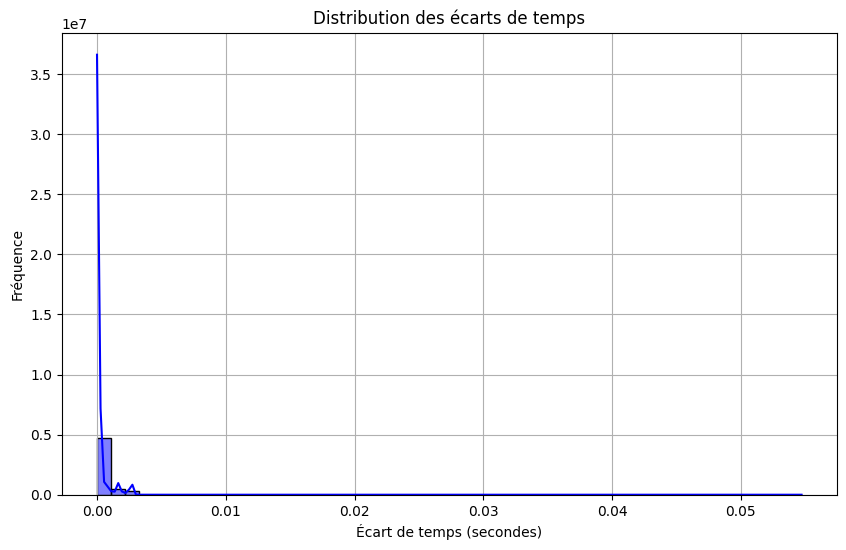

In [19]:
time_deltas = df_net_1['Time'].diff().dt.total_seconds().dropna()

plt.figure(figsize=(10, 6))
sns.histplot(time_deltas, bins=50, kde=True, color="blue")
plt.title("Distribution des écarts de temps")
plt.xlabel("Écart de temps (secondes)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

L'acquisition des données n'est pas à la même fréquence que celle des données physiques. En effet, les données physiques sont enregistrées toutes les 1s, tandis qu'ici, il n'y a pas d'enregistrement continue. 

Les données sont enregistrées lorsqu'il y a une interraction réseau.